In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from utils import *
import scipy.stats
import seaborn as sns
from ipywidgets import interact, interactive, FloatProgress, IntProgress
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, confusion_matrix

In [2]:
data_filename = 'ret-and-ewma-2009-2012-EURGBP-EURJPY-EURUSD-GBPCHF-GBPJPY-GBPUSD-USDJPY-XAGUSD-XAUGBP-XAUUSD.h5'

### TODO: create random dataset. and save to file.

In [3]:
ds = pd.read_hdf(data_filename)

In [4]:
ds = ds[:10000]

In [5]:
print len(ds)*1e-6, "M"
ds = ds.dropna()
print len(ds)*1e-6, "M"
ds.tail(5).transpose()

0.01 M
0.002543 M


ts,2009-01-12 23:28:00,2009-01-12 23:29:00,2009-01-12 23:30:00,2009-01-12 23:31:00,2009-01-12 23:32:00
px,-151.873284,-151.565600,-151.257899,-152.219951,-152.234034
ret-2,0.069742,0.215896,0.142618,-0.151514,-0.223917
ewma4-2,-0.003524,0.057526,0.094118,-0.047506,-0.064703
ret-4,-0.060365,0.045208,0.149798,0.047099,-0.059454
ewma8-4,-0.029376,0.003847,0.037344,-0.007134,-0.028186
ret-8,0.026411,0.026433,0.063891,-0.121398,-0.084623
ewma16-8,-0.037644,-0.024569,-0.007588,-0.018687,-0.026193
ret-16,0.066139,0.066163,0.066188,0.014365,-0.038904
ewma32-16,-0.065127,-0.059166,-0.050767,-0.052947,-0.054510
ret-32,-0.111336,-0.092772,-0.074143,-0.128870,-0.147246


In [6]:
ds.head(10000).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
px,2543.0,-169.227844,17.055437,-199.029105,-186.546054,-168.878974,-150.392300,-140.057238
ret-2,2543.0,0.000354,0.266137,-0.906908,-0.150467,-0.006473,0.140103,0.969298
ewma4-2,2543.0,0.001348,0.173474,-0.721113,-0.088082,-0.004098,0.085164,0.818226
ret-4,2543.0,0.000995,0.261645,-0.920058,-0.157615,-0.007815,0.146931,0.944731
ewma8-4,2543.0,0.002267,0.166687,-0.692438,-0.080938,-0.002044,0.085839,0.695632
ret-8,2543.0,0.003201,0.259141,-0.932296,-0.145184,-0.009201,0.138818,0.920847
ewma16-8,2543.0,0.003230,0.168625,-0.658629,-0.084039,-0.002383,0.102649,0.624355
ret-16,2543.0,0.005827,0.260521,-0.868117,-0.136401,-0.010013,0.157741,0.857732
ewma32-16,2543.0,0.005102,0.171725,-0.527238,-0.088656,-0.005581,0.105840,0.517755
ret-32,2543.0,0.007491,0.277018,-0.828278,-0.152923,-0.006190,0.176907,0.856057


In [7]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [8]:
#random sample of points
n_sample = 2000
sample_idx = np.random.choice(len(ds), n_sample)

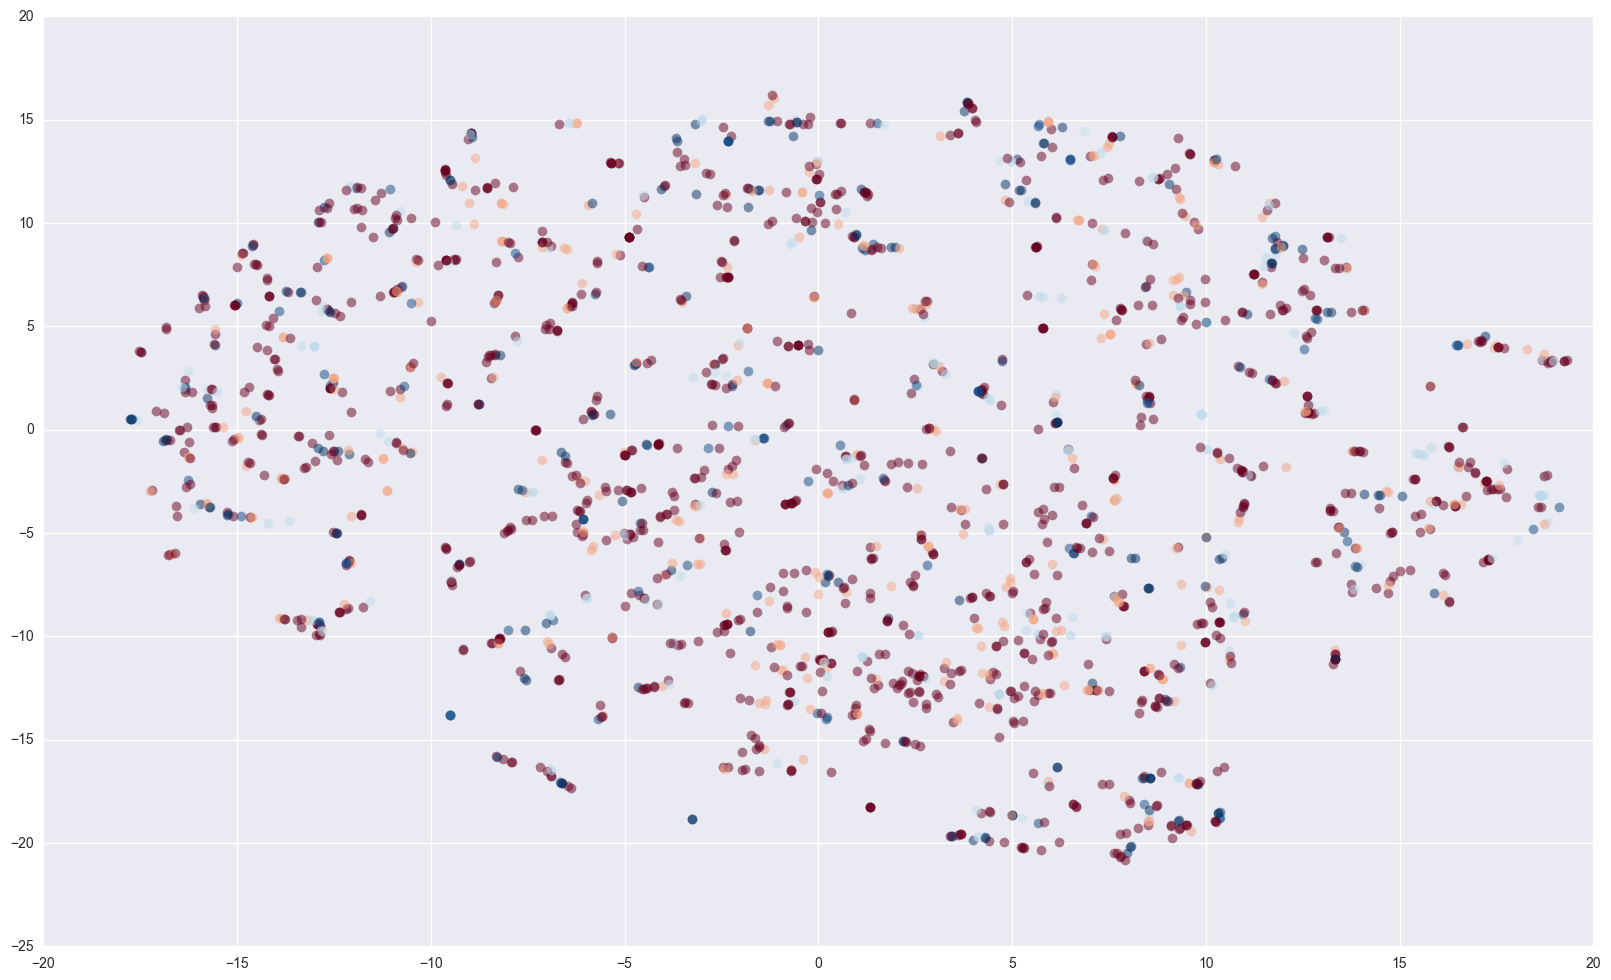

In [9]:
FIGSIZE=(20,12)
X = ds.drop('px', axis=1).fillna(0.0)
y = ds['px'].diff().shift(-10)
xt = tsne.fit(X.ix[sample_idx])

plt.figure(figsize=FIGSIZE)
c = y.ix[sample_idx]/y.ix[sample_idx].std()
for i in range(n_sample):    
    plt.plot(xt.embedding_[i,0], xt.embedding_[i,1], 'o', color=plt.cm.RdBu(c[i]), alpha=0.5)

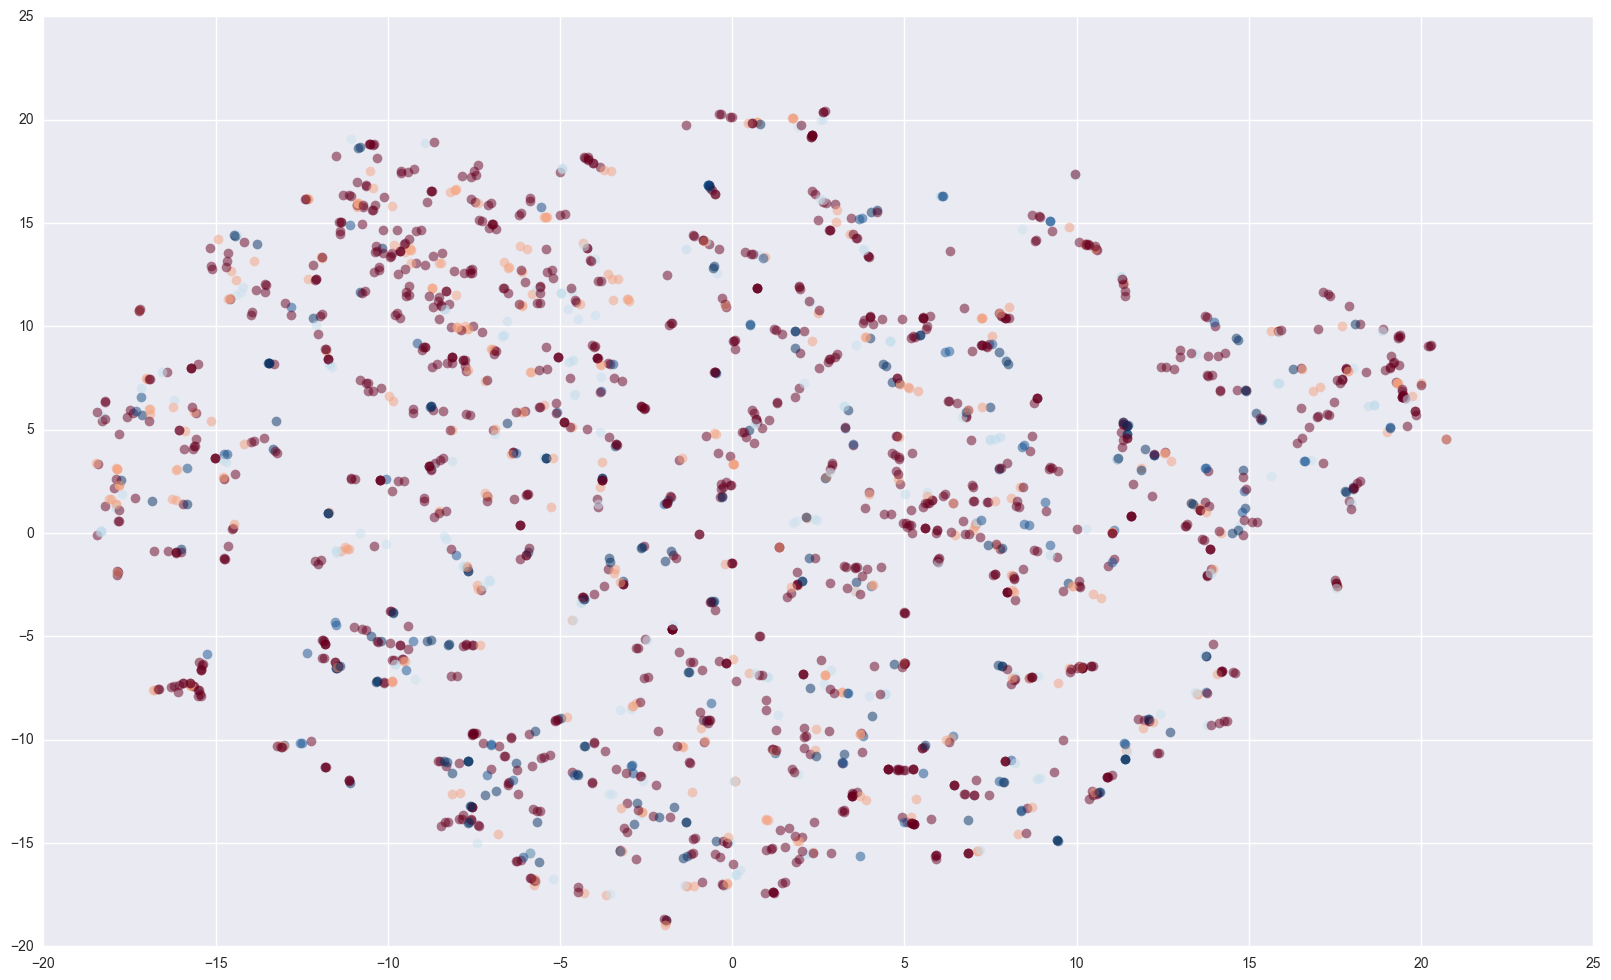

In [10]:
FIGSIZE=(20,12)
X = ds.drop('px', axis=1).fillna(0.0)
y = ds['px'].diff().shift(-1)
xt = tsne.fit(X.ix[sample_idx])

plt.figure(figsize=FIGSIZE)
c = y.ix[sample_idx]/y.ix[sample_idx].std()
for i in range(n_sample):    
    plt.plot(xt.embedding_[i,0], xt.embedding_[i,1], 'o', color=plt.cm.RdBu(c[i]), alpha=0.5)

In [9]:
n_categories = 5
X = ds.drop('px', axis=1).fillna(0.0)
n = len(X)
y = ds['px'].diff().shift(-10).fillna(0.0)

ntrain = int(0.95*n)
X_train = X[0:ntrain]
X_test = X[ntrain:]
y_train = y[0:ntrain]
y_train = y_train -y_train.mean()
Y_train = pd.qcut(y_train,n_categories, labels=False)

y_test = y[ntrain:]
Y_test = pd.qcut(y_test,n_categories, labels=False)



In [10]:
del ds

In [11]:
print "train"
print "X", X_train.shape
print "Y", Y_train.shape

print "test"
print "X", X_test.shape
print "Y", Y_test.shape

train
X (2415, 16)
Y (2415,)
test
X (128, 16)
Y (128,)


In [12]:
X_train.head(3)

,ret-2,ewma4-2,ret-4,ewma8-4,ret-8,ewma16-8,ret-16,ewma32-16,ret-32,ewma64-32,ret-64,ewma128-64,ret-128,ewma256-128,ret-256,ewma512-256
ts,,,,,,,,,,,,,,,,
2009-01-09 03:13:00,-0.008149,0.063396,0.247107,0.069255,0.109634,0.045036,0.044090,0.006208,-0.049679,-0.056660,-0.000067,-0.097187,-0.221346,-0.071935,-0.189444,-0.034659
2009-01-09 03:14:00,-0.221543,-0.078350,-0.059805,0.003980,-0.035465,0.024196,-0.032630,0.001799,-0.121862,-0.056270,-0.038427,-0.096763,-0.238502,-0.072094,-0.201824,-0.034844
2009-01-09 03:15:00,-0.354783,-0.163669,-0.261793,-0.067214,-0.035470,-0.007545,-0.109829,-0.008112,-0.175512,-0.057914,-0.077066,-0.096972,-0.264136,-0.072447,-0.208101,-0.035091


In [13]:
Y_train.head()

ts
2009-01-09 03:13:00    4
2009-01-09 03:14:00    0
2009-01-09 03:15:00    0
2009-01-09 03:16:00    2
2009-01-09 03:17:00    4
Name: px, dtype: int64

----------------------

---

In [26]:
import os
import keras
SAVE_MODEL_EPOCHS = 3
class Experiment(keras.callbacks.Callback):

    def __init__(self, run_id, epoch_count=0, tl = [], dl = []):
        self.run_id = run_id
        self.train_losses = tl        
        self.dev_losses = dl
        self.epoch_count = epoch_count
        self.last_model_file = None
        
    def on_epoch_end(self, epoch, logs):
        print logs
        self.train_losses.append(logs['loss'])
        self.dev_losses.append(logs['val_loss'])
        
        self.epoch_count+=1
        if self.epoch_count % SAVE_MODEL_EPOCHS == 0:
            self.last_model_file = 'model-{}-{}.h5'.format(self.run_id, self.epoch_count)
            self.model.save(self.last_model_file)
            self.save()
            
    def save(self):
        np.savez(
            Experiment.filename(run_id), 
            run_id=self.run_id, 
            epoch_count=self.epoch_count, 
            tl=np.array(self.train_losses), 
            dl=np.array(self.dev_losses),
            last_model_file=self.last_model_file)
        
    @classmethod
    def filename(cls, run_id):
        return "experiment_" + run_id + ".npz"
        
    @classmethod 
    def load(cls, run_id):
        fname = Experiment.filename(run_id)
        print "loading from file:", fname
        npz = np.load(fname)
        run_id = str(npz['run_id'])
        epoch_count = int(npz['epoch_count'])
        tl = list(npz['tl'])
        dl = list(npz['dl'])
        last_model_file = str(npz['last_model_file'])
        experiment = Experiment(run_id, epoch_count, tl, dl)
        experiment.last_model_file = last_model_file
        return experiment
    
    @classmethod
    def create_or_load(cls, run_id):
        fname = Experiment.filename(run_id)
        if os.path.exists(fname):
            prog = cls.load(run_id)
            print "loaded progress: ", prog.run_id, "training epochs:", prog.epoch_count
            return prog
        else:
            print "creating new progress for run id:", run_id
            return Experiment(run_id)
        

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.utils import np_utils


In [28]:
n_features = X_train.shape[1]
print "n_features", n_features

n_features 16


In [29]:
def build_model(n_features, loss_function):
    model = Sequential()
    model.add(Dense(500, input_dim=n_features, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim=n_categories, activation='softmax', init='he_normal'))

    model.compile(loss=loss_function, optimizer='adam')
    return model

In [30]:
model = build_model(n_features, 'mean_squared_error')

In [34]:
run_id = "foo3"
progress = Experiment.create_or_load(run_id)

loading from file: experiment_foo3.npz
loaded progress:  foo3 training epochs: 18


Train on 2390 samples, validate on 25 samples
Epoch 19/20
{'loss': 0.16163800656795502, 'val_loss': 0.15962369740009308}
0s - loss: 0.1616 - val_loss: 0.1596
Epoch 20/20
{'loss': 0.16161163151264191, 'val_loss': 0.15958116948604584}
0s - loss: 0.1616 - val_loss: 0.1596


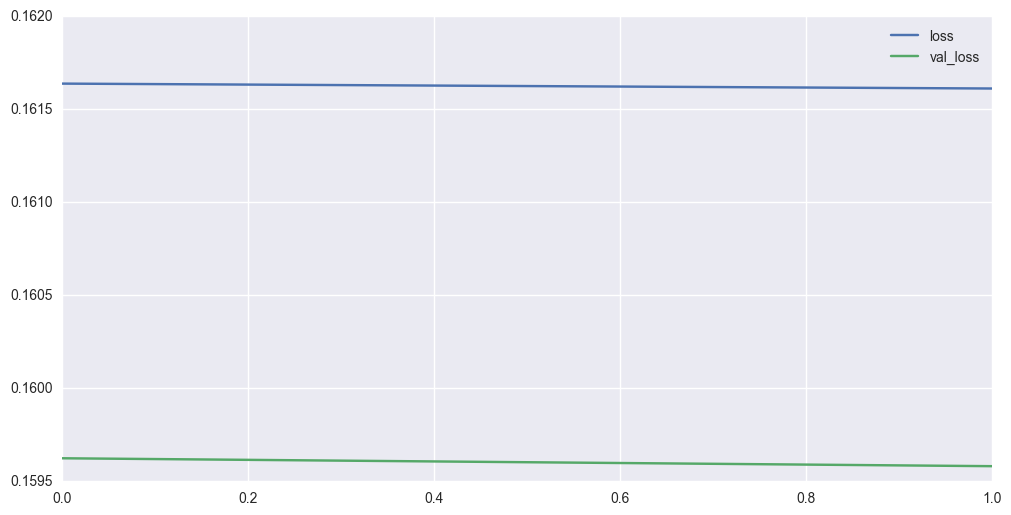

In [35]:
epochs=20
batch_size=80000
hist=model.fit(
    X_train.as_matrix(), np_utils.to_categorical(Y_train),
    batch_size=batch_size, nb_epoch=epochs, validation_split=0.01, verbose=2,
    callbacks=[progress],
    initial_epoch=progress.epoch_count)

plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

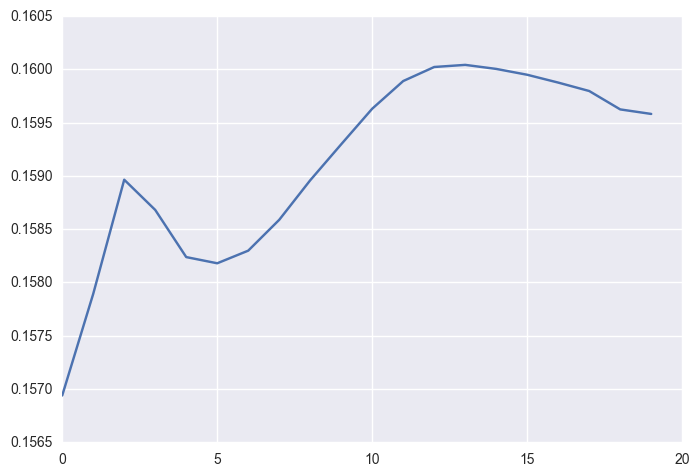

In [36]:
plt.plot(progress.dev_losses)

In [37]:
hist.params

{'batch_size': 80000,
 'do_validation': True,
 'metrics': ['loss', 'val_loss'],
 'nb_epoch': 20,
 'nb_sample': 2390,
 'verbose': 2}

In [59]:
import datetime as dt
timestr = dt.datetime.strftime(dt.datetime.now(), "%Y%d%m-%H%M%S")
filename = "norm-price-ewma-mse_500_500_500_500_{}.h5".format(timestr)

model.save(filename)
print "saved model to", filename

saved model to norm-price-ewma-mse_500_500_500_500_20170602-012702.h5


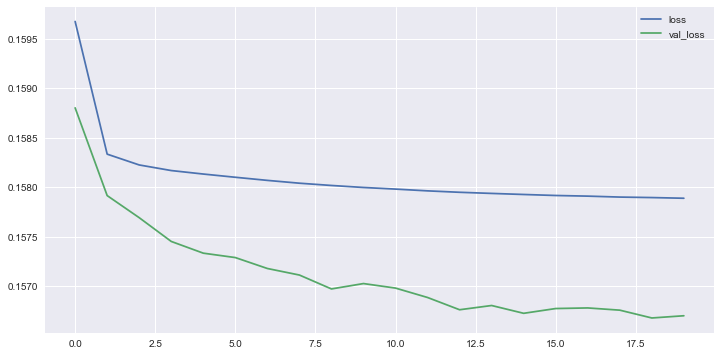

In [60]:
plt.figure(figsize=(12,6))
plt.plot(all_history['loss'], label='loss')
plt.plot(all_history['val_loss'], label='val_loss')
plt.legend()

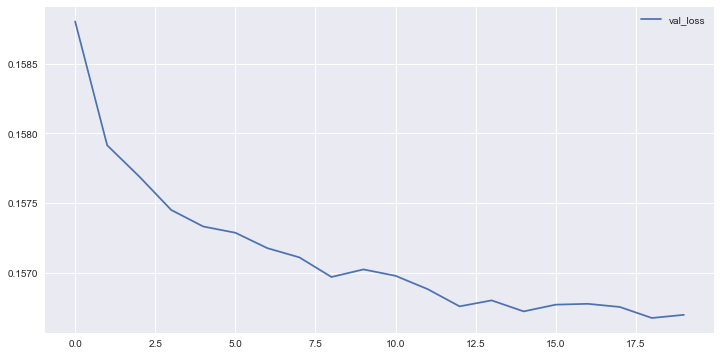

In [61]:
plt.figure(figsize=(12,6))
#plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

[[ 24610  17322  66230     27  27296]
 [ 12697  17040  92776     37  12934]
 [  9591  14610 101059     29  10195]
 [ 12275  16238  93263     31  13677]
 [ 23384  16336  66323     30  29411]]
0.254127049501
0.200835719912


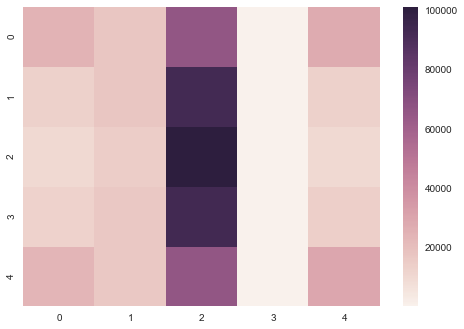

In [62]:
Y_pred = model.predict(X_test.as_matrix(), batch_size=2000, verbose=2)
pred_classes = np_utils.categorical_probas_to_classes(Y_pred)
conf_matrix =  confusion_matrix(Y_test, pred_classes)
print conf_matrix
print accuracy_score(Y_test,pred_classes)
print f1_score(Y_test,pred_classes, average='weighted')
sns.heatmap(conf_matrix)